# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex medium (512), strong scaling benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [14]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [15]:
import sys
sys.path.append('../../../python-modules')

In [16]:
from appanalysis import osbli

## Read data files

### ARCHER

In [17]:
archerfiles = {1:'../TGV512ss/results/ARCHER/output_1nodes_201808020923.txt'
               }

In [18]:
archercpn = 24
archernodes, archertime, archerperf = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              24            10.0                0.100


### Cirrus

In [19]:
cirrusfiles = {1:'../TGV512ss/results/Cirrus/output_1nodes_201808020826.txt',
               2:'../TGV512ss/results/Cirrus/output_2nodes_201808020850.txt',
               4:'../TGV512ss/results/Cirrus/output_4nodes_201808020916.txt',
               8:'../TGV512ss/results/Cirrus/output_8nodes_201808020924.txt'
               }

In [20]:
cirruscpn = 36
cirrusnodes, cirrustime, cirrusperf = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              36            10.3                0.097
              2              72             5.4                0.186
              4             144             3.0                0.331
              8             288             1.4                0.713


### Isambard

In [21]:
gw4files = {1:'../TGV512ss/results/Isambard/output_1nodes_201808020732.txt'
               }

In [22]:
gw4cpn = 64
gw4nodes, gw4time, gw4perf = osbli.calcperf(gw4files, gw4cpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              1              64             5.6                0.178


## Plot performance

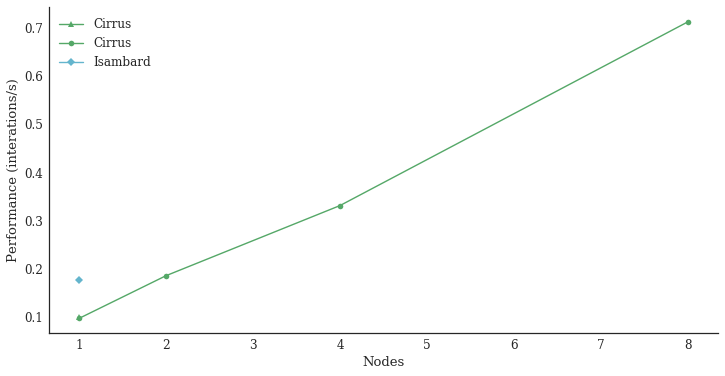

In [24]:
plt.plot(archernodes, archerperf, '^-', color=cols[1], label='Cirrus')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(gw4nodes, gw4perf, 'D-', color=cols[5], label='Isambard')
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

## Compare performance

In [25]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]/(archercpn)
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]/(cirruscpn)
nperf['Isambard'] = gw4time[0]
cperf['Isambard'] = gw4time[0]/(gw4cpn)

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '==============', '==========='))
print("1-node")
for system in sorted(nperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system]))

print("per-core")
for system in sorted(cperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system]))

Performance improvement relative to ARCHER:

         System  Iter. Time (s)     Improvement
         ======  ==============     ===========
1-node
         ARCHER           9.999           1.000
         Cirrus          10.313           0.970
       Isambard           5.628           1.777
per-core
         ARCHER           0.417           1.000
         Cirrus           0.286           1.454
       Isambard           0.088           4.737
